# <span style='color:red'>Quantitative Investing with Python</span>

### Professor Juhani Linnainmaa

Dartmouth College and Kepos Capital (Co-Director of Research)

--- 

# **Topic 2:** Working with Pandas Dataframes: ADDITIONAL EXAMPLES

This notebook contains some additional examples using data downloaded from Yahoo Finance

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import yfinance as yf
from datetime import datetime, timedelta

### Loading data

In [2]:
# Create a list that contains the tickers we want to retrieve
ticker_symbols = ['AAPL', 'MSFT', 'GOOGL', 'NFLX', 'TSLA', 'META', 'AMZN', 'XOM', 'JNJ', 'NVDA']

# Define the start and end dates for the data
end_date = datetime.today()
start_date = end_date - timedelta(days=5 * 365)  # Five years ago

# Download the data for each stock
stock_data = yf.download(ticker_symbols, start=start_date, end=end_date)

# Print the first few rows of the downloaded data
print(stock_data.head())

# Columns are a multiindex with two levels
# What is contained on those levels?
columns = stock_data.columns
for level in range(stock_data.columns.nlevels):
    unique_values = list(columns.get_level_values(level=level).drop_duplicates())
    print(f'Level {level}: {unique_values}')

[*********************100%***********************]  10 of 10 completed
            Adj Close                                                \
                 AAPL       AMZN      GOOGL         JNJ        META   
Date                                                                  
2019-01-17  37.399025  84.661003  54.956001  112.749680  148.300003   
2019-01-18  37.629395  84.809998  55.365002  114.147163  150.039993   
2019-01-22  36.784752  81.608498  53.931499  112.496376  147.570007   
2019-01-23  36.933525  82.000999  54.220501  112.496376  144.300003   
2019-01-24  36.640778  82.746498  54.200001  110.950424  145.830002   

                                                                     ...  \
                  MSFT        NFLX       NVDA       TSLA        XOM  ...   
Date                                                                 ...   
2019-01-17  100.771255  353.190002  37.635376  23.153999  55.851852  ...   
2019-01-18  102.281113  339.100006  38.927757  20.150667

### Take adjusted closes and plot them 

In [3]:
stock_data.index = pd.to_datetime(stock_data.index)

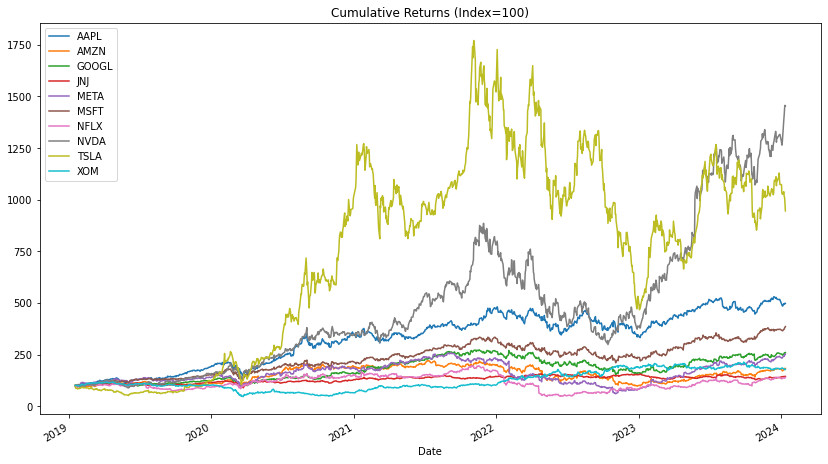

In [4]:
adj_close = stock_data.xs('Adj Close', axis=1, level=0)

# normalize prices to start from 100
first_nonmissing = adj_close.apply(lambda col: col.dropna().iloc[0])

adj_close_normalized = 100 * adj_close.div(first_nonmissing)
adj_close_normalized.plot(title='Cumulative Returns (Index=100)', figsize=(14,8));

## Looking at the data with .loc and .iloc

- .loc uses labels
- .iloc uses indices that start from 0 (as all indices in Python)
- symbol : is a **slice**; is is used to indicate a range; the end point is *NOT* included in Python *unless* we slice labels 
- when it comes to dates - *if* the index is a *datetime* - Python is pretty smart in figuring out what you want

In [5]:
# first five rows and columns

display(adj_close.iloc[:5,:5])

# last five rows and columns (- indicates that we count from the end)
display(adj_close.iloc[-5:,-5:])

# all of February 2020 for AAPL and GOOGL
display(adj_close.loc['2020-02', ['AAPL', 'GOOGL']])

,AAPL,AMZN,GOOGL,JNJ,META
Date,,,,,
2019-01-17,37.399025,84.661003,54.956001,112.749680,148.300003
2019-01-18,37.629395,84.809998,55.365002,114.147163,150.039993
2019-01-22,36.784752,81.608498,53.931499,112.496376,147.570007
2019-01-23,36.933525,82.000999,54.220501,112.496376,144.300003
2019-01-24,36.640778,82.746498,54.200001,110.950424,145.830002


,MSFT,NFLX,NVDA,TSLA,XOM
Date,,,,,
2024-01-08,374.690002,485.029999,522.530029,240.449997,100.919998
2024-01-09,375.790009,482.089996,531.400024,234.960007,99.669998
2024-01-10,382.769989,478.329987,543.500000,233.940002,98.690002
2024-01-11,384.630005,492.230011,548.219971,227.220001,98.669998
2024-01-12,388.470001,492.160004,547.099976,218.889999,99.949997


,AAPL,GOOGL
Date,,
2020-02-03,75.176598,74.129997
2020-02-04,77.658463,72.270500
2020-02-05,78.291733,72.302498
2020-02-06,79.207497,73.798500
2020-02-07,78.130867,73.955498
2020-02-10,78.501945,75.432999
2020-02-11,78.028305,75.502998
2020-02-12,79.881310,75.931503
2020-02-13,79.312462,75.669502


### Compute daily returns

In [6]:
daily_returns = adj_close.pct_change()

# Describe returns
daily_returns.describe()

,AAPL,AMZN,GOOGL,JNJ,META,MSFT,NFLX,NVDA,TSLA,XOM
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,0.001480,0.000725,0.000960,0.000369,0.001122,0.001259,0.000698,0.002661,0.002621,0.000697
std,0.020103,0.022136,0.019982,0.012490,0.027471,0.019145,0.028905,0.032558,0.040748,0.021603
min,-0.128647,-0.140494,-0.116341,-0.072984,-0.263901,-0.147390,-0.351166,-0.184521,-0.210628,-0.122248
25%,-0.008164,-0.010857,-0.008490,-0.005484,-0.011466,-0.008355,-0.013501,-0.015155,-0.017684,-0.010929
50%,0.001267,0.000883,0.001054,0.000345,0.001050,0.001168,0.000476,0.003054,0.001975,0.000411
75%,0.012365,0.012066,0.011067,0.006191,0.014318,0.011151,0.014378,0.019820,0.022111,0.011576
max,0.119808,0.135359,0.096202,0.079977,0.232824,0.142169,0.168543,0.243696,0.198949,0.126868


### Report annualized average returns and standard deviations

In [7]:
summary = daily_returns.describe().T

report = pd.DataFrame()

report['Annualized mean return'] = 252 * summary['mean']
report['Annualized volatility'] = np.sqrt(252) * summary['std']
report['Worst daily return'] = summary['min']
report['Best daily return'] = summary['max']

# sort by Annualized mean return 
report = report.sort_values('Annualized mean return')

# Change style to display everything in percentages
report.style.format("{:.1%}")


,Annualized mean return,Annualized volatility,Worst daily return,Best daily return
JNJ,9.3%,19.8%,-7.3%,8.0%
XOM,17.6%,34.3%,-12.2%,12.7%
NFLX,17.6%,45.9%,-35.1%,16.9%
AMZN,18.3%,35.1%,-14.0%,13.5%
GOOGL,24.2%,31.7%,-11.6%,9.6%
META,28.3%,43.6%,-26.4%,23.3%
MSFT,31.7%,30.4%,-14.7%,14.2%
AAPL,37.3%,31.9%,-12.9%,12.0%
TSLA,66.1%,64.7%,-21.1%,19.9%
NVDA,67.1%,51.7%,-18.5%,24.4%


### Correlations

In [8]:
corr = daily_returns.corr().round(2)
corr

,AAPL,AMZN,GOOGL,JNJ,META,MSFT,NFLX,NVDA,TSLA,XOM
AAPL,1.00,0.62,0.68,0.40,0.59,0.76,0.47,0.66,0.49,0.31
AMZN,0.62,1.00,0.66,0.22,0.61,0.68,0.55,0.60,0.43,0.16
GOOGL,0.68,0.66,1.00,0.34,0.67,0.76,0.46,0.63,0.41,0.30
JNJ,0.40,0.22,0.34,1.00,0.24,0.41,0.16,0.23,0.10,0.31
META,0.59,0.61,0.67,0.24,1.00,0.62,0.50,0.55,0.35,0.18
MSFT,0.76,0.68,0.76,0.41,0.62,1.00,0.49,0.71,0.45,0.27
NFLX,0.47,0.55,0.46,0.16,0.50,0.49,1.00,0.48,0.37,0.11
NVDA,0.66,0.60,0.63,0.23,0.55,0.71,0.48,1.00,0.50,0.23
TSLA,0.49,0.43,0.41,0.10,0.35,0.45,0.37,0.50,1.00,0.17
XOM,0.31,0.16,0.30,0.31,0.18,0.27,0.11,0.23,0.17,1.00


Questions:
    
1. What stocks are the most correlated with each other -- that is, they comove the most?
2. How about the lowest correlations?

In [9]:
# put all correlations into a big list
corr_flat = corr.stack()

# remove "self" correlations (e.g., AAPL-AAPL, which is 1,0)
I_keep = corr_flat.index.get_level_values(0) != corr_flat.index.get_level_values(1)
corr_flat = corr_flat[I_keep]

# every pair appears twice (from below and above the diagonal)
# keep the pair that is in alphabetical order
I_keep = corr_flat.index.get_level_values(0) < corr_flat.index.get_level_values(1)
corr_flat = corr_flat[I_keep]

# sort by correlations
corr_flat = corr_flat.sort_values()

# turn the series into dataframe for display purposes
corr_flat = corr_flat.to_frame(name='correlation')

In [10]:
print('Lowest correlations', end='\n\n')

corr_flat.head(3)

Lowest correlations



,,correlation
JNJ,TSLA,0.10
NFLX,XOM,0.11
AMZN,XOM,0.16


In [11]:
print('Highest correlations', end='\n\n')

corr_flat.tail(3)

Highest correlations



,,correlation
MSFT,NVDA,0.71
GOOGL,MSFT,0.76
AAPL,MSFT,0.76


## Get "safe" Treasury bill returns from Ken French's website 

In [12]:
import requests
from io import BytesIO, StringIO
import zipfile

# Specify the file we want to read -- the CSV file inside has almost the same name 
filename = 'F-F_Research_Data_5_Factors_2x3_daily_CSV.zip'
csvname = filename.split('_CSV.zip')[0] + '.CSV'

# URL of the zip file we want to read
url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/' + filename 

# Send an HTTP GET request to the URL
response = requests.get(url)

# If the request is NOT successful, raise an exception
if response.status_code != 200:
    raise Exception(f"Failed to download zip file. Status code: {response.status_code}")

with zipfile.ZipFile(BytesIO(response.content)) as zip_file:

    # Check if the file exists in the zip archive
    if csvname in zip_file.namelist():
        # Read the CSV file directly from the zip archive
        with zip_file.open(csvname) as csv_file:
            lines = csv_file.readlines()

        # Remove first three rows
        lines = lines[3:]

        # Create a DataFrame from the trimmed lines using StringIO
        # First need to decode byte strings into unicode
        lines = [line.decode("utf-8") for line in lines]
        clean_csv = '\n'.join(lines)
        df = pd.read_csv(StringIO(clean_csv))                
        
        print(f'File {csvname} read successfully!')
    else:
        print(f'Zip file found but file {csvname} not found in the archive.')   

File F-F_Research_Data_5_Factors_2x3_daily.CSV read successfully!


## Convert returns to decimals and date from YYYYMMDD to datatime

In [13]:
print('Data before processing:\n')
print(df.head(3))

df['date'] = df['Unnamed: 0'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
ff_data = df.loc[:,'Mkt-RF':'date'].set_index('date') / 100

print('\nData after processing:\n')
print(ff_data.head(3))

# make sure that we cover the time period in both daily_returns and ff_data
ff_data = ff_data.reindex(daily_returns.index)

print('\nData after reindexing:\n')
print(ff_data.head(3))


Data before processing:

   Unnamed: 0  Mkt-RF   SMB   HML   RMW   CMA     RF
0    19630701   -0.67  0.02 -0.35  0.03  0.13  0.012
1    19630702    0.79 -0.28  0.28 -0.08 -0.21  0.012
2    19630703    0.63 -0.18 -0.10  0.13 -0.25  0.012

Data after processing:

            Mkt-RF     SMB     HML     RMW     CMA       RF
date                                                       
1963-07-01 -0.0067  0.0002 -0.0035  0.0003  0.0013  0.00012
1963-07-02  0.0079 -0.0028  0.0028 -0.0008 -0.0021  0.00012
1963-07-03  0.0063 -0.0018 -0.0010  0.0013 -0.0025  0.00012

Data after reindexing:

            Mkt-RF     SMB     HML     RMW     CMA      RF
Date                                                      
2019-01-17  0.0075  0.0009 -0.0024  0.0006  0.0000  0.0001
2019-01-18  0.0129 -0.0029  0.0012  0.0020 -0.0027  0.0001
2019-01-22 -0.0153 -0.0035  0.0032  0.0026  0.0034  0.0001


## Compute average returns and covariance matrix of returns for our stocks using data up to 2019-12

In [14]:
expected_returns = daily_returns.mean()
covariance_matrix = daily_returns.cov()
rf = ff_data['RF'].mean()

# .cov uses pairwise covariances - IF we had gaps, the matrix might be nonsensical 
# let's verify that it is OK, meaning that it is positive-definite 
is_positive_definite = np.all(np.linalg.eigvals(covariance_matrix.to_numpy()) > 0)
if is_positive_definite:
    print('Covariance matrix OK')
else:
    raise Exception('Covariance matrix is NOT OK; try dropping rows with missing observations and/or assets with missing data')

Covariance matrix OK


In [15]:
# Define a function to calculate portfolio statistics
def portfolio_statistics(weights, expected_returns, covariance_matrix):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Define a function to calculate the negative Sharpe ratio (since scipy minimizes)
def neg_sharpe_ratio(weights, expected_returns, covariance_matrix, risk_free_rate):
    portfolio_return, portfolio_volatility = portfolio_statistics(weights, expected_returns, covariance_matrix)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# Set constraints for optimization (weights should sum to 1)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Set bounds for optimization (weights should be between 0 and 1)
bounds = tuple((0, 1) for asset in range(len(expected_returns)))

# Start from an equal-weighted portfolio
initial_weights = [1 / len(expected_returns)] * len(expected_returns)

# Use scipy.optimize to find the weights that maximize the Sharpe ratio
result = minimize(neg_sharpe_ratio, initial_weights,
                  args=(expected_returns, covariance_matrix, rf),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimized weights
tangency_weights = result.x

# Display the results
tangency_return, tangency_volatility = portfolio_statistics(tangency_weights, expected_returns, covariance_matrix)
sharpe_ratio = -result.fun  # Convert back to positive Sharpe ratio

tangency_weights_s = pd.Series(100*tangency_weights, index=expected_returns.index).map("{:.2f}%".format)

print("Tangency Portfolio Weights:\n")
print(tangency_weights_s);


print(f"\nTangency Portfolio Return: {252*tangency_return:.2%}")
print(f"\nTangency Portfolio Volatility: {np.sqrt(252)*tangency_volatility:.2%}")
print(f"\nTangency Portfolio Sharpe Ratio: {np.sqrt(252)*sharpe_ratio:.2f}")


Tangency Portfolio Weights:

AAPL     30.44%
AMZN      0.00%
GOOGL     0.00%
JNJ       0.00%
META      0.00%
MSFT      0.00%
NFLX      0.00%
NVDA     43.77%
TSLA     17.36%
XOM       8.43%
dtype: object

Tangency Portfolio Return: 53.65%

Tangency Portfolio Volatility: 38.07%

Tangency Portfolio Sharpe Ratio: 1.36


# Potential questions to consider:

- What is the out-of-sample performance of this portfolio?
- What if we don't have the constraints?
- What if we shrink the covariance matrix towards diagonal?